### Diagnostic Analytics on Student Scores Dataset

In [1]:
from google.colab import files
uploaded = files.upload()

Saving student-scores.csv to student-scores.csv


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np


df = pd.read_csv("student-scores.csv")

numeric_cols = [
    "absence_days", "weekly_self_study_hours",
    "math_score", "history_score", "physics_score",
    "chemistry_score", "biology_score",
    "english_score", "geography_score"
]

## 1. Correlation Analysis


--- Correlation Analysis ---
                         absence_days  weekly_self_study_hours  math_score  \
absence_days                 1.000000                -0.286086   -0.237072   
weekly_self_study_hours     -0.286086                 1.000000    0.393569   
math_score                  -0.237072                 0.393569    1.000000   
history_score               -0.128159                 0.276231    0.147247   
physics_score               -0.136419                 0.202120    0.115719   
chemistry_score             -0.084029                 0.201340    0.127131   
biology_score               -0.090554                 0.190481    0.081298   
english_score               -0.084861                 0.247796    0.134831   
geography_score             -0.002942                 0.153622    0.049672   

                         history_score  physics_score  chemistry_score  \
absence_days                 -0.128159      -0.136419        -0.084029   
weekly_self_study_hours       0.276231   

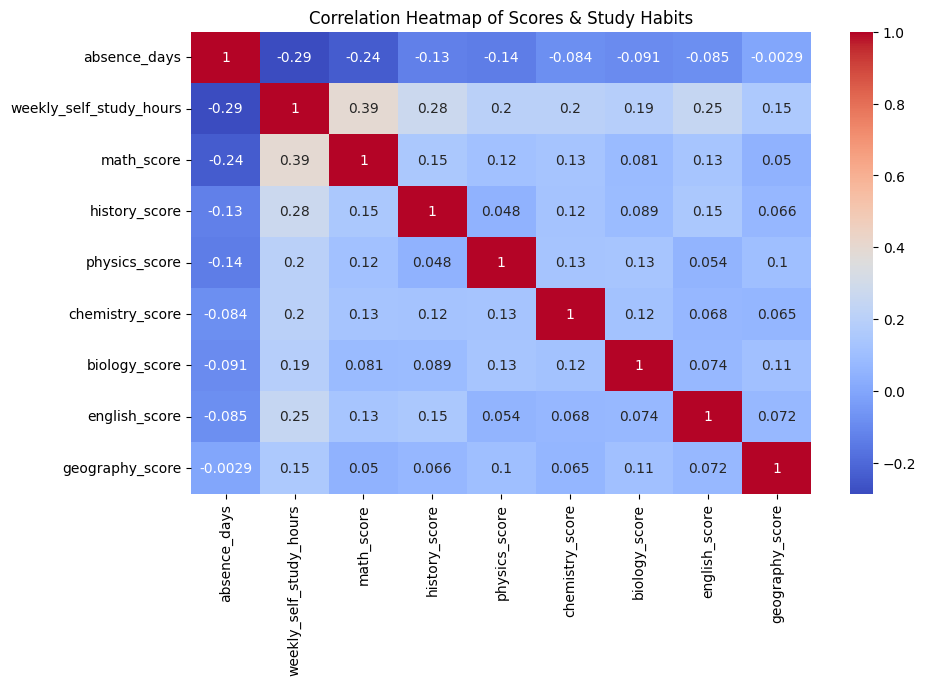

In [4]:
print("\n--- Correlation Analysis ---")
corr_matrix = df[numeric_cols].corr()
print(corr_matrix)

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Scores & Study Habits")
plt.show()

## 2. Group Comparison


--- Group Comparison: Gender-wise Mean Scores ---
        absence_days  weekly_self_study_hours  math_score  history_score  \
gender                                                                     
female      3.742515                16.822355   82.792415      80.495010   
male        3.588176                18.692385   84.114228      80.168337   

        physics_score  chemistry_score  biology_score  english_score  \
gender                                                                 
female      80.678643        80.382236      79.216567      81.740519   
male        81.996994        79.606212      79.947896      80.812625   

        geography_score  
gender                   
female        80.953094  
male          80.822645  


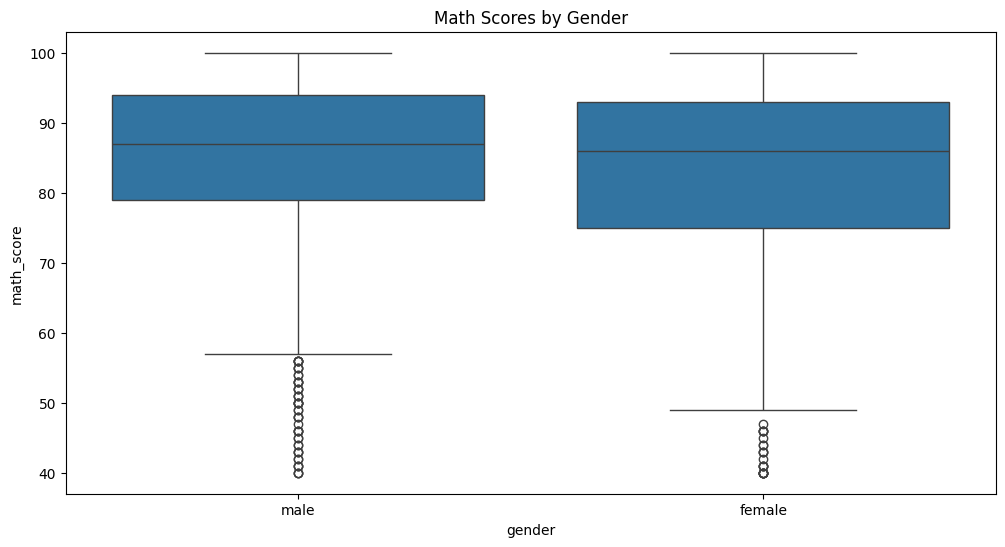

<Figure size 1400x600 with 0 Axes>

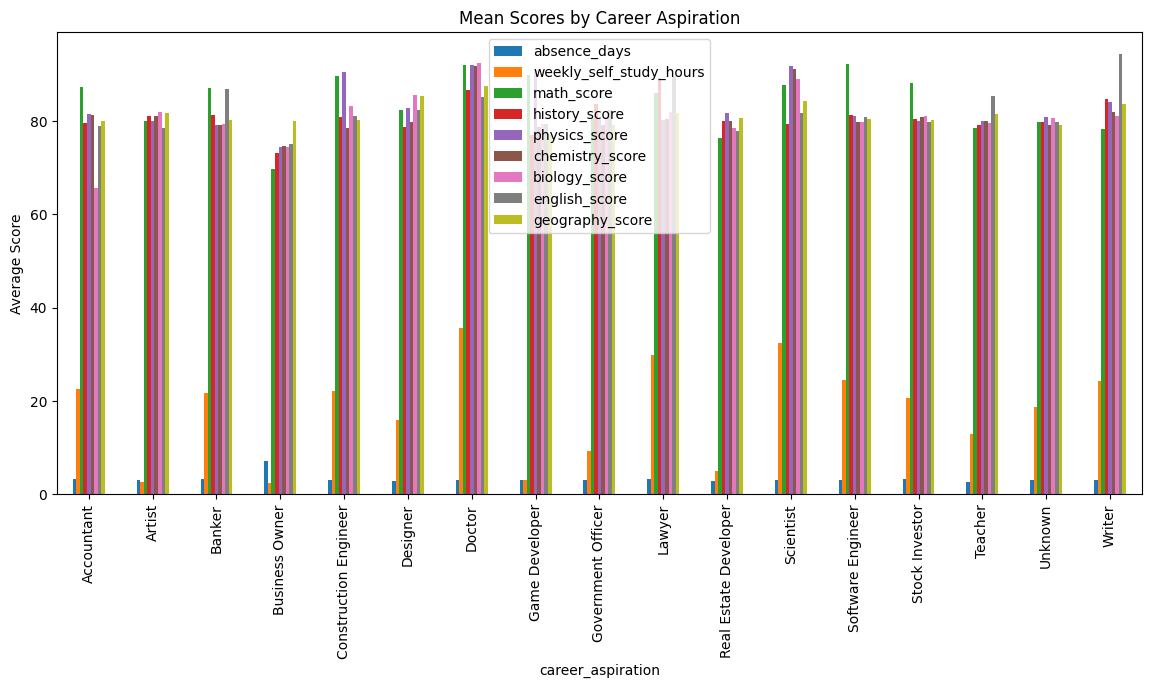

In [5]:
print("\n--- Group Comparison: Gender-wise Mean Scores ---")
print(df.groupby("gender")[numeric_cols].mean())

plt.figure(figsize=(12,6))
sns.boxplot(x="gender", y="math_score", data=df)
plt.title("Math Scores by Gender")
plt.show()

plt.figure(figsize=(14,6))
df.groupby("career_aspiration")[numeric_cols].mean().plot(kind="bar", figsize=(14,6))
plt.title("Mean Scores by Career Aspiration")
plt.ylabel("Average Score")
plt.show()

## 3. Regression Analysis

In [6]:
print("\n--- Regression Analysis: Math Score ~ Weekly Self Study Hours ---")
X = df[["weekly_self_study_hours"]]
y = df["math_score"]

reg = LinearRegression()
reg.fit(X, y)

print(f"Intercept: {reg.intercept_:.2f}, Coefficient: {reg.coef_[0]:.2f}")
print("This means for every extra hour of self-study per week, math score increases by ~",
      round(reg.coef_[0],2), "points.")


--- Regression Analysis: Math Score ~ Weekly Self Study Hours ---
Intercept: 75.83, Coefficient: 0.43
This means for every extra hour of self-study per week, math score increases by ~ 0.43 points.


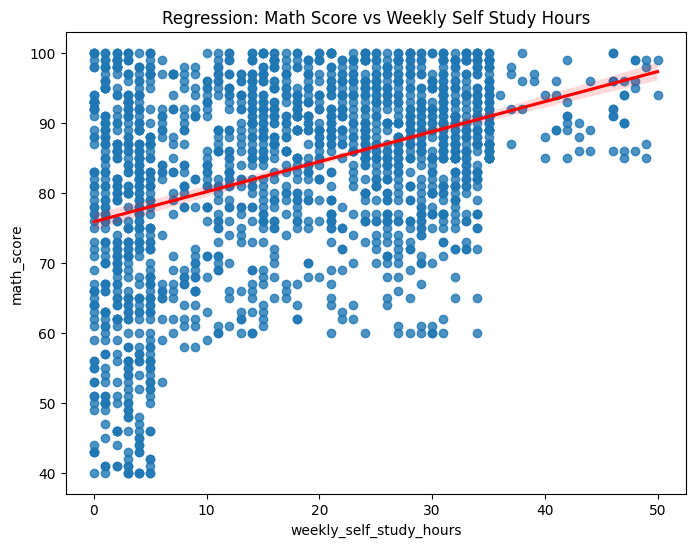

In [7]:
plt.figure(figsize=(8,6))
sns.regplot(x="weekly_self_study_hours", y="math_score", data=df, line_kws={"color":"red"})
plt.title("Regression: Math Score vs Weekly Self Study Hours")
plt.show()


## 4. Outlier Detection


--- Outlier Detection (Z-score > 3) ---
Number of Outlier Students: 45
Sample Outliers:
       id  gender  math_score  weekly_self_study_hours
29    30  female          82                       19
49    50  female         100                       14
90    91    male          95                       14
114  115    male          43                        0
151  152    male          41                        2


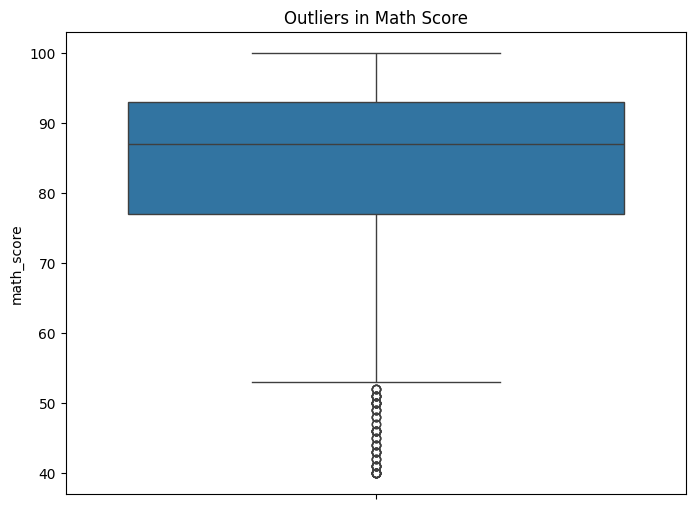

In [8]:
print("\n--- Outlier Detection (Z-score > 3) ---")
from scipy import stats

z_scores = np.abs(stats.zscore(df[numeric_cols]))
outliers = np.where(z_scores > 3)

# Get unique student IDs with outliers
outlier_indices = np.unique(outliers[0])
print("Number of Outlier Students:", len(outlier_indices))
print("Sample Outliers:\n", df.iloc[outlier_indices][["id","gender","math_score","weekly_self_study_hours"]].head())

# Boxplot to visualize outliers in Math Score
plt.figure(figsize=(8,6))
sns.boxplot(y=df["math_score"])
plt.title("Outliers in Math Score")
plt.show()